<div style="background:#FFFFAA">
<img src="logo.jpg", width=150, ALIGN="left", border=20>
<h1>Sample Starting Kit </h1>
    <span style="color:red"> <h1> Keep all code below **yellow** text blocks, </h1> </span>
    <span style="color:red"> <h1> but check that it works (you can ADD not remove). </h1> </span>
    <span style="color:red"> <h1> Customize Section (1) and modify the explanations.</h1> </span>

<br>This code was tested with <br>
Python 3.8.5 |Anaconda custom (64-bit)| (default, Sep  4 2020, 02:22:02) (https://anaconda.org/)<br>
<i> Adapted for original code of Balázs Kégl</i> <br>
</center>
<p>
ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 
</div>

<div style="background:#FFFFAA">
    <h2>Introduction </h2>
    <p>
    <span style="color:red"> Here write here a short description of your problem. </span>
     <br>
The wine dataset is a multi-class classification data set form the <a href="http://archive.ics.uci.edu/ml/datasets/Wine">UCI Machine Learning Repository</a>, formated in AutoMl format. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

References and credits: 

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy
        
 <br>
    <span style="color:red"> Keep the next block. </span>
</div>

In [1]:
model_dir = 'sample_code_submission/'                        # Change the model to a better one once you have one!
#model_dir = '../FILES/pretty_good_sample_code_submission/'
result_dir = 'sample_result_submission/' 
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
# Uncomment the next lines to auto-reload libraries (this causes some problem with pickles in Python 3)
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

<div style="background:#FFFFAA">
    <h1> Step 1: Exploratory data analysis </h1>
<p>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.
    <br>
    <span style="color:red"> Just change the data name in the block below. In the rest of the section, replace the sample plots by anything you want. </span>
</div>

In [2]:
data_dir = 'sample_data'              # Change this to the directory where you put the input data
#data_dir = '../FILES/iris/'          # The sample_data directory should contain only a very small subset of the data
data_name = 'wine'
!dir $data_dir*

 Volume in drive C is Windows
 Volume Serial Number is B212-C5CC

 Directory of C:\Users\laris\Downloads\m1ai2021-main (1)\m1ai2021-main\starting_kit

08/03/2021  01:44 AM    <DIR>          sample_data
               0 File(s)              0 bytes
               1 Dir(s)   2,907,275,264 bytes free


In [35]:
result_name

'sample_data'

In [3]:
from data_io import read_as_df
data = read_as_df(data_dir  + '/' + data_name)                # The data are loaded as a Pandas Data Frame

Reading sample_data/wine_train from AutoML format
Number of examples = 130
Number of features = 13
     Class
0  Class 1
1  Class 2
2  Class 3
Number of classes = 3


In [4]:
data.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,target
0,12.37,0.94,1.36,10.60,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.00,Class 2
1,13.11,1.01,1.70,NaN,15.0,78.00,2.98,3.18,0.26,2.28,5.30,1.12,3.18,Class 2
2,12.08,2.08,1.70,NaN,17.5,97.00,2.23,2.17,0.26,1.40,3.30,1.27,2.96,Class 2
3,13.03,0.90,NaN,1.71,16.0,86.00,1.95,2.03,0.24,1.46,4.60,1.19,2.48,Class 2
4,12.21,1.19,1.75,16.80,151.0,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718.00,Class 2


In [5]:
data.describe() 

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,130.000000,128.000000,127.000000,127.000000,128.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,12.951538,2.307578,2.254409,18.182205,94.343750,6.514846,3.295385,0.479231,1.526692,4.771846,1.076508,2.508154,687.234538
std,0.825863,1.148746,0.252101,4.332248,22.214572,18.366391,10.485249,0.500776,0.653267,2.404782,0.657599,0.780614,357.008011
min,11.030000,0.740000,0.920000,1.710000,15.000000,0.980000,0.340000,0.130000,0.240000,0.300000,0.480000,0.730000,0.930000
25%,12.300000,1.517500,2.180000,16.650000,86.750000,1.700000,1.250000,0.270000,1.045000,2.862500,0.780000,1.750000,453.250000
50%,12.855000,1.775000,2.290000,19.000000,95.000000,2.380000,2.035000,0.345000,1.480000,4.390000,0.980000,2.750000,630.000000
75%,13.657500,3.065000,2.390000,21.000000,104.250000,2.860000,2.857500,0.465000,1.950000,6.182500,1.120000,3.155000,911.500000
max,14.830000,5.800000,3.430000,24.500000,162.000000,98.000000,87.000000,3.180000,3.580000,10.800000,5.300000,4.000000,1680.000000


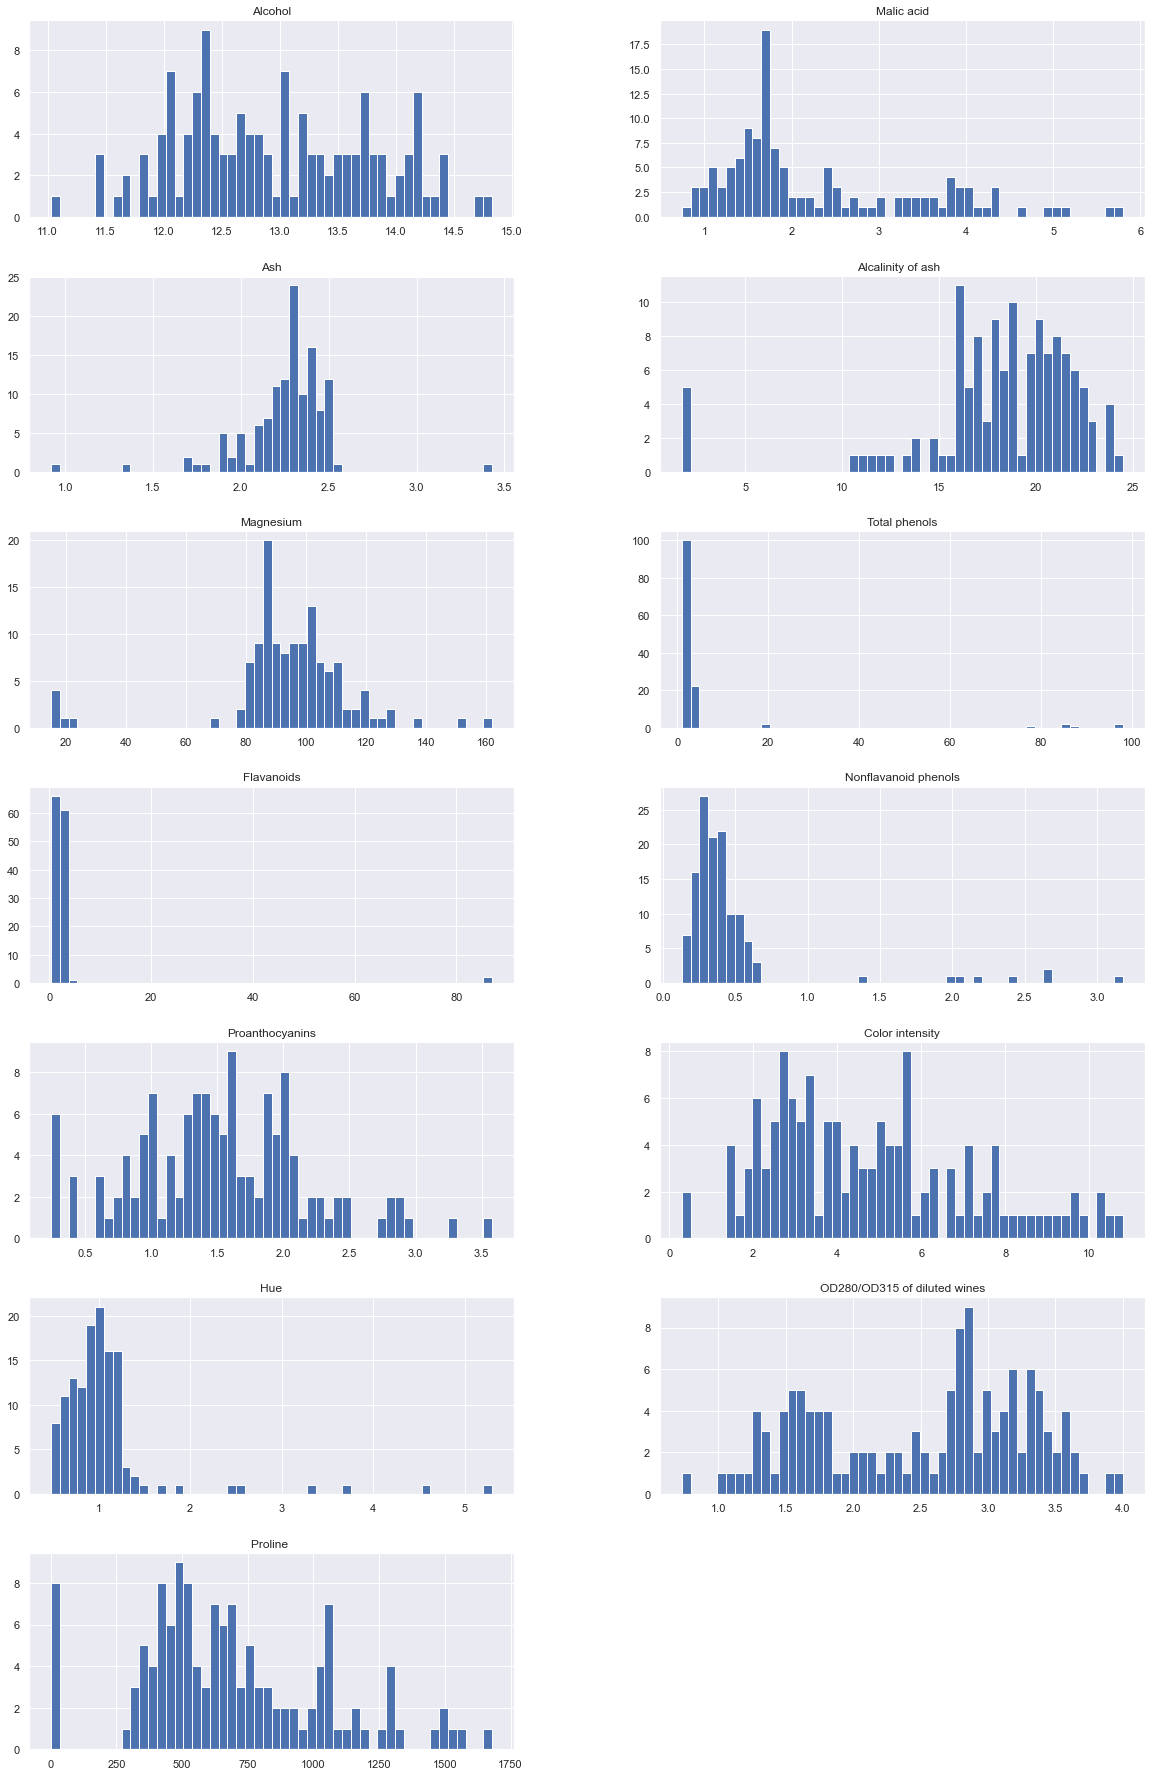

In [6]:
data.hist(figsize=(20, 60), bins=50, layout=(13, 2));

In [81]:
data.dtypes

Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                       float64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
Proline                         float64
target                           object
dtype: object

<AxesSubplot:xlabel='Hue', ylabel='Alcohol'>

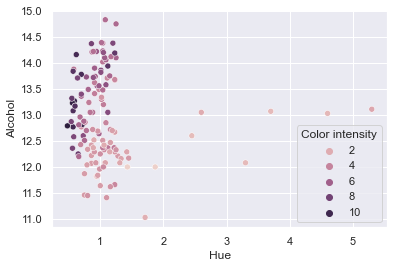

In [98]:
sns.scatterplot(data=data, x="Hue", y="Alcohol",hue="Color intensity")

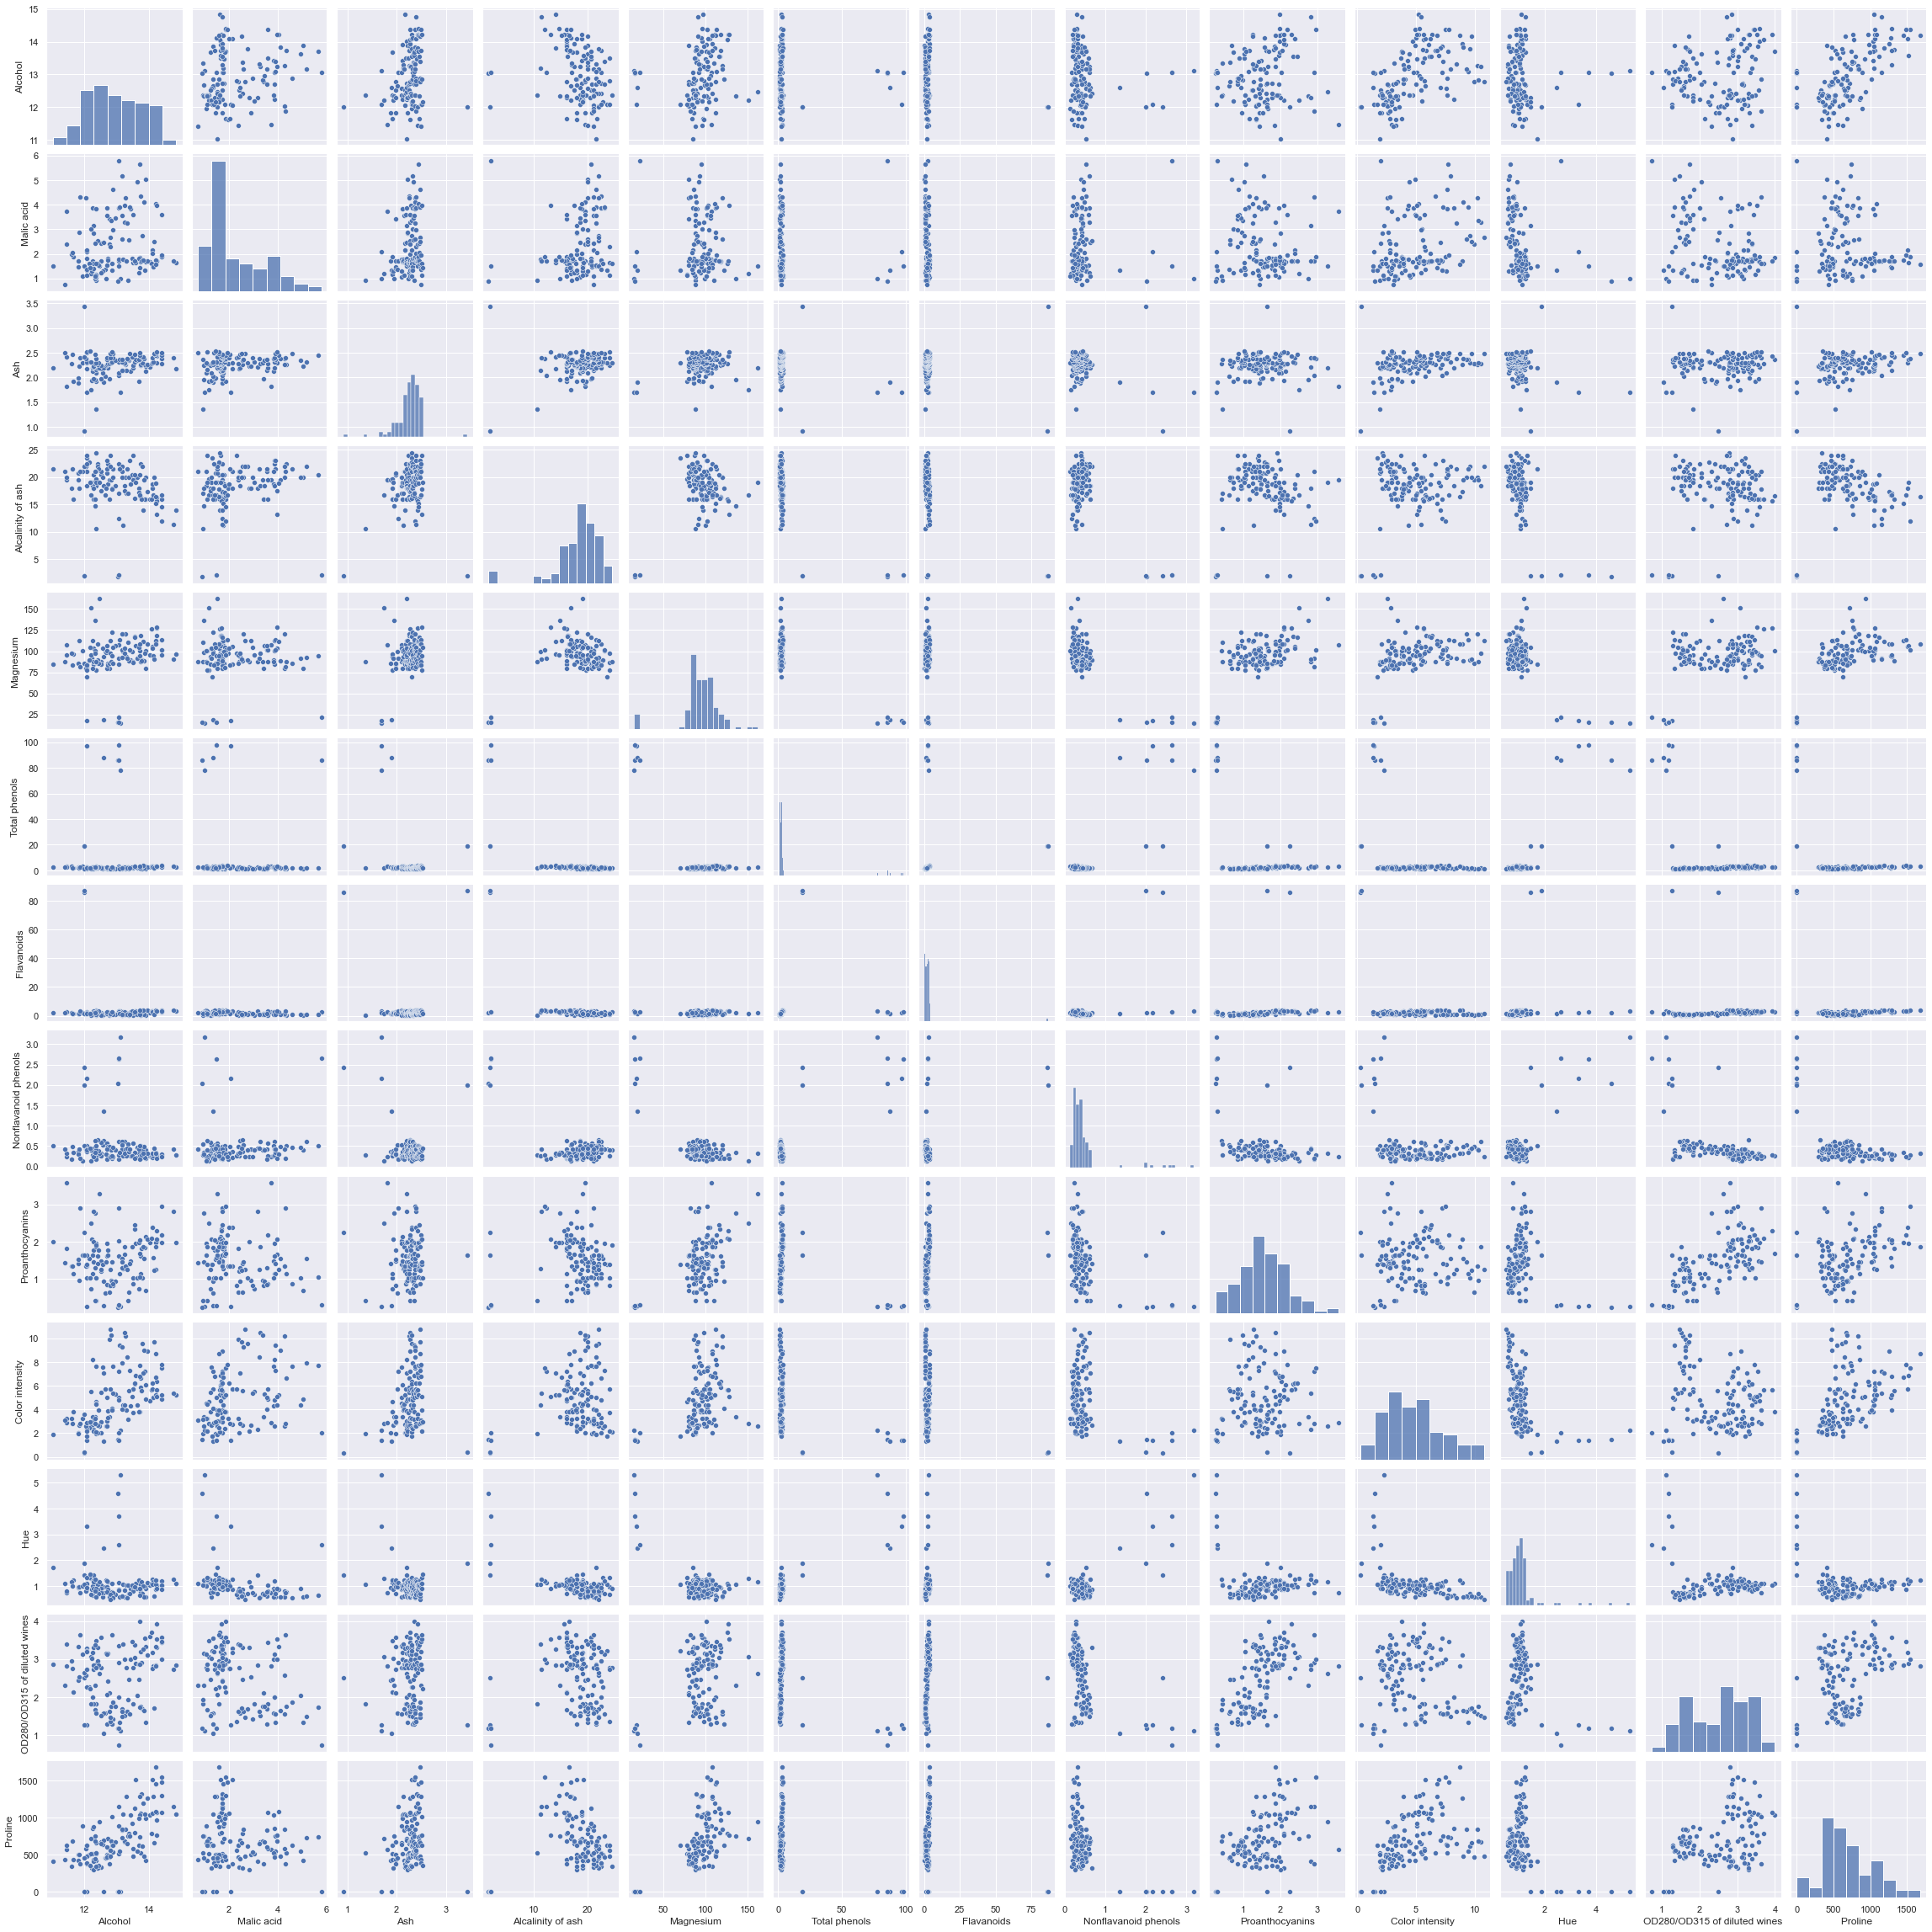

In [99]:
sns.pairplot(data)

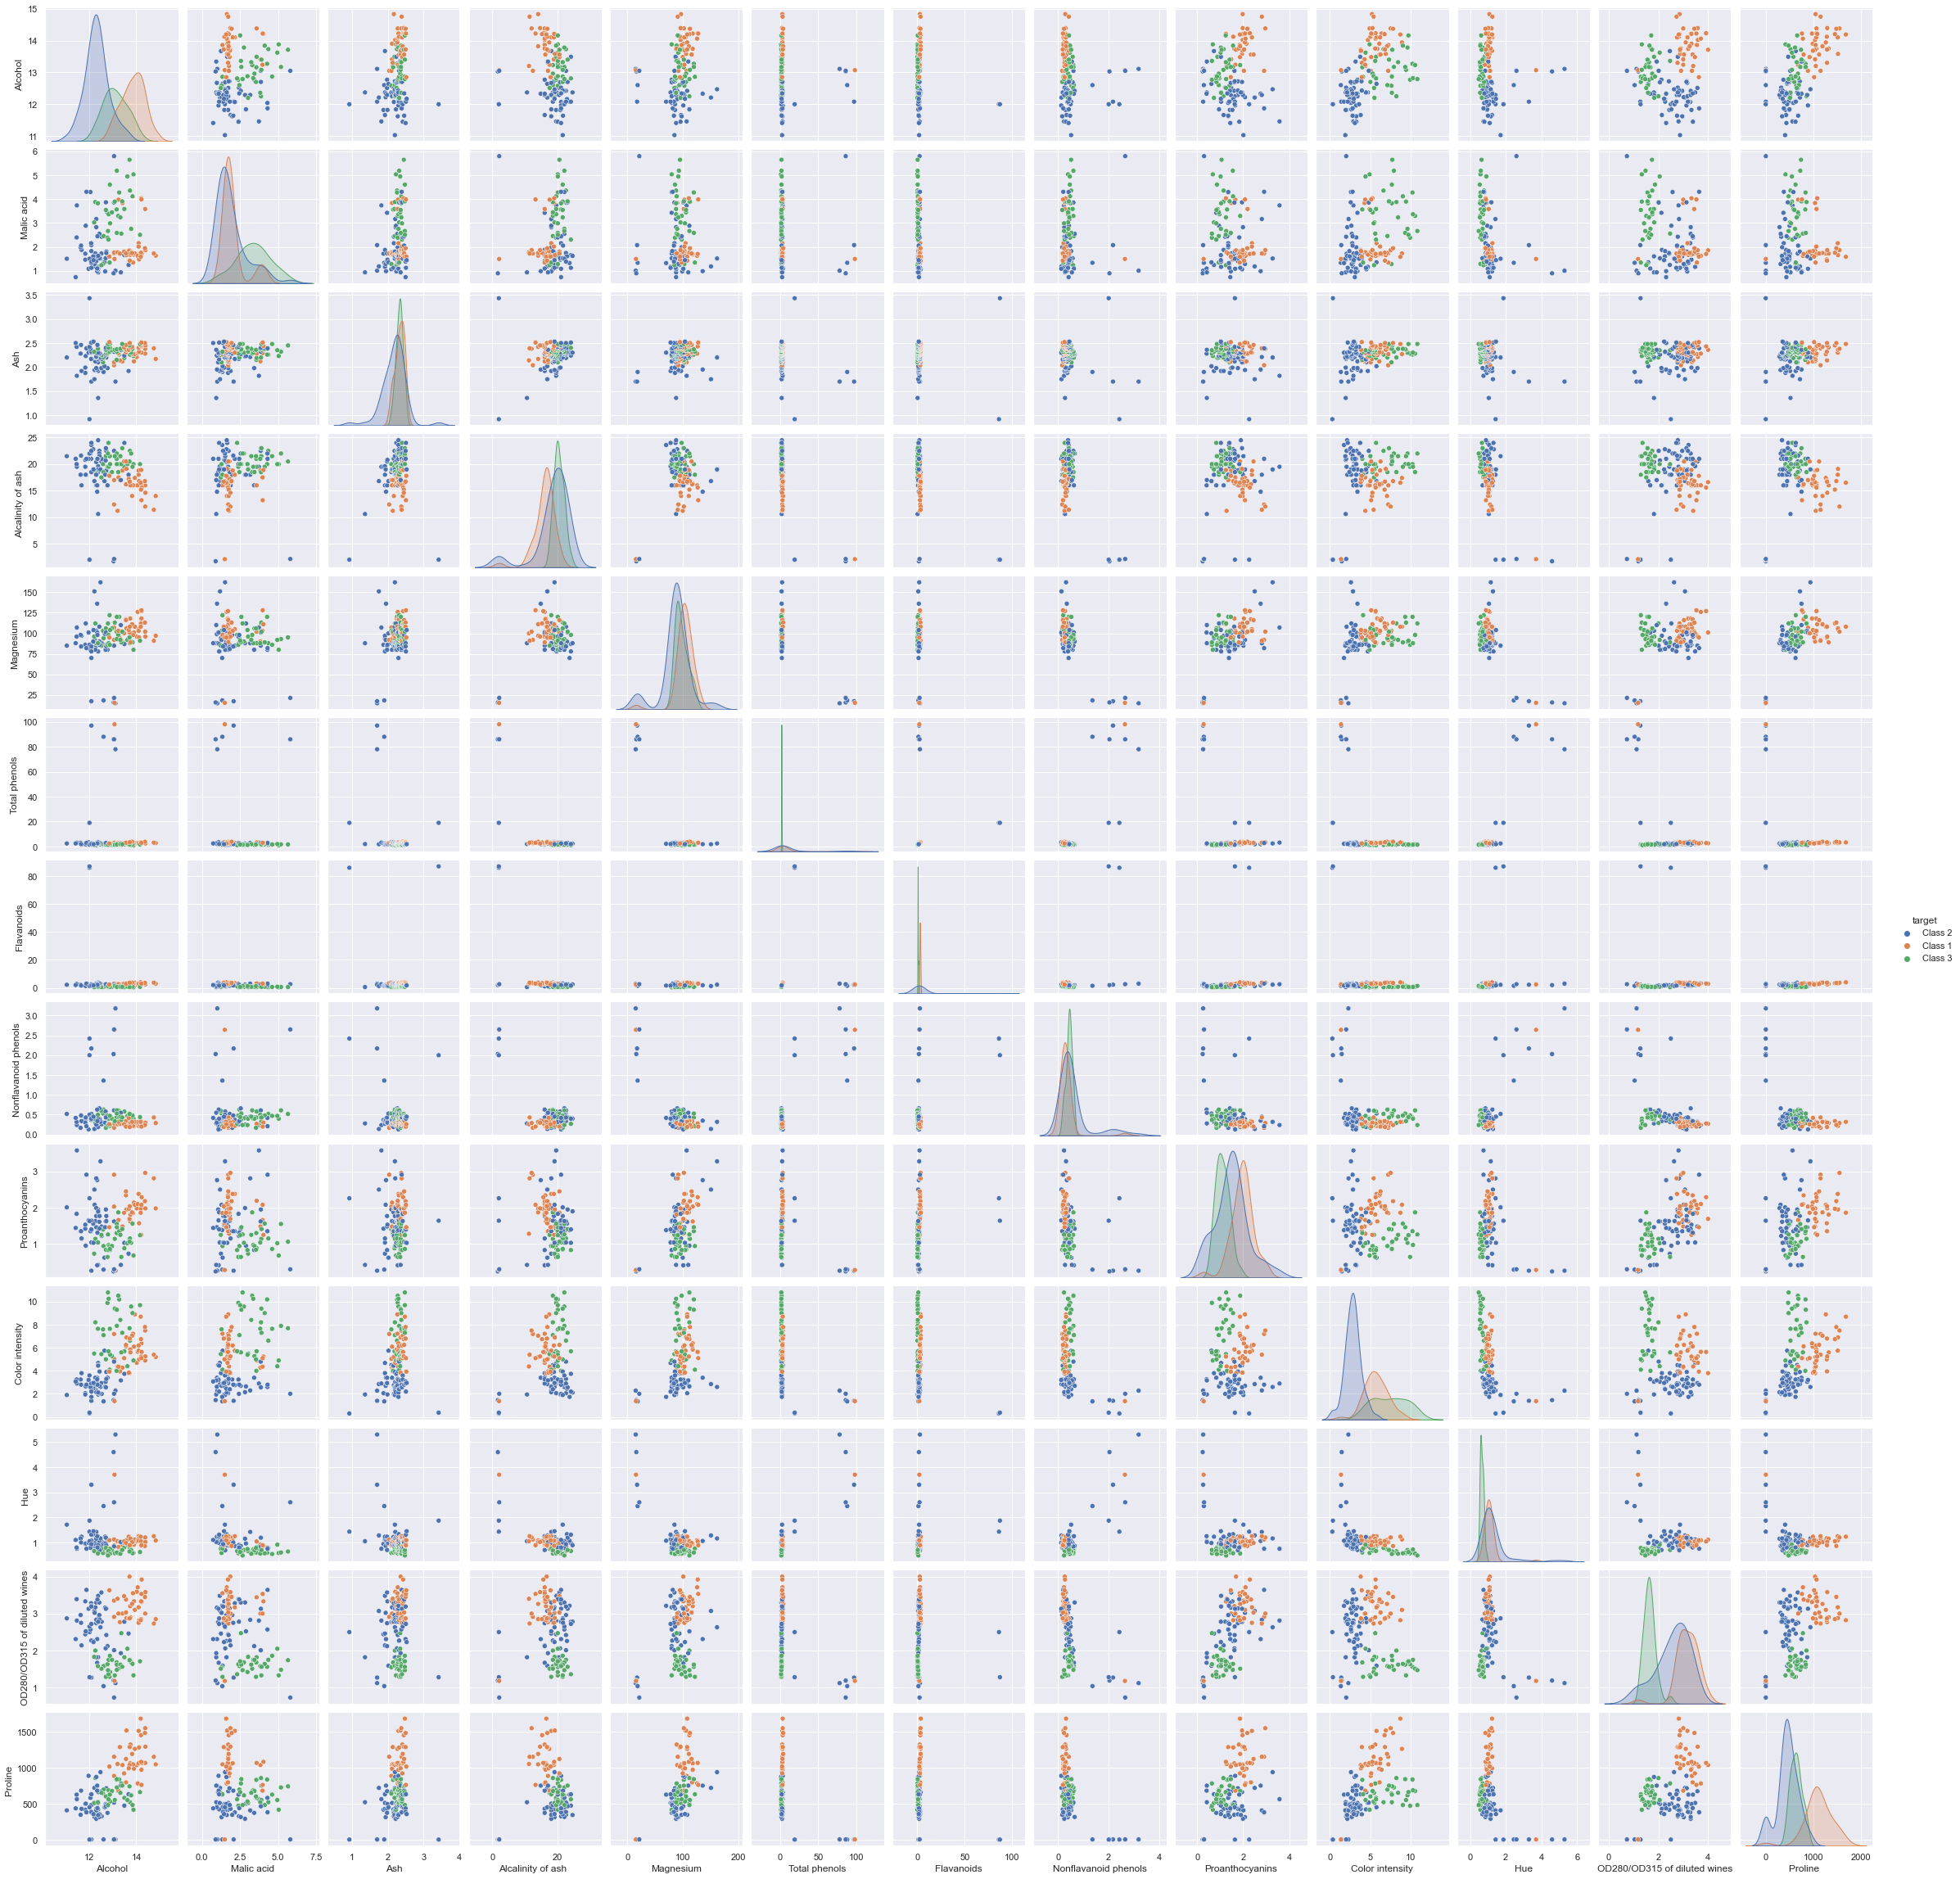

In [7]:
sns.pairplot(data, hue="target")

<div style="background:#FFFFAA">
<h1>Step 2: Building a predictive model</h1>
</div>

<div style="background:#FFFFAA">
    <h2>Loading data with DataManager</h2>
    <p>
We reload the data with the AutoML DataManager class because this is more convenient:
   <br>     <span style="color:red"> Keep this, it illustrates how data in AutoML formal are loaded by the ingestion program </span>
</div>

In [8]:
from data_manager import DataManager
D = DataManager(data_name, data_dir, replace_missing=True)
print(D)

Info file found : C:\Users\laris\Downloads\m1ai2021-main (1)\m1ai2021-main\starting_kit\sample_data\wine_public.info
DataManager : wine
info:
	usage = Wine dataset
	name = wine
	task = multiclass.classification
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 13
	target_num = 3
	label_num = 3
	train_num = 130
	valid_num = 16
	test_num = 32
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:
	X_train = arrayDataManager : wine
info:
	usage = Wine dataset
	name = wine
	task = multiclass.classification
	target_type = Numerical
	feat_type = Numerical
	metric = bac_metric
	time_budget = 1200
	feat_num = 13
	target_num = 3
	label_num = 3
	train_num = 130
	valid_num = 16
	test_num = 32
	has_categorical = 0
	has_missing = 0
	is_sparse = 0
	format = dense
data:

	X_train = array(130, 13)
	Y_train = array(130, 1)
	X_valid = array(16, 13)
	Y_valid = array(16, 1)
	X_test = array(32, 13)
	Y_test = array(32, 1)
feat_type:	arra

<div style="background:#FFFFAA">
    <h2>Training a predictive model</h2>
    <p>
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.
    </div>

In [9]:
from data_io import write
from model import model
# Uncomment the next line to show the code of the model
#??model 

<div style="background:#FFFFAA">
an instance of the model (run the constructor) and attempt to reload a previously saved version from `sample_code_submission/`:
    
</div>

In [20]:
M = model()
trained_model_name = model_dir + data_name
# Uncomment the next line to re-load an already trained model
#M = M.load(trained_model_name)                  

<div style="background:#FFFFAA">
    Train the model (unless you reloaded a trained model) and make predictions. 
</div>

In [15]:
if not(M.is_trained):
    X_train = D.data['X_train']
    Y_train = D.data['Y_train']
    M.fit(X_train, Y_train)                     

Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

ok
FIT: dim(X)= [130, 13]
FIT: dim(y)= [130, 1]
PREDICT: dim(X)= [130, 13]
PREDICT: dim(y)= [130, 1]
PREDICT: dim(X)= [16, 13]
PREDICT: dim(y)= [16, 1]
PREDICT: dim(X)= [32, 13]
PREDICT: dim(y)= [32, 1]


<div style="background:#FFFFAA">
    <b> Save the trained model </b> (will be ready to reload next time around) and save the prediction results. IMPORTANT: if you save the trained model, it will be bundled with your sample code submission. Therefore your model will NOT be retrained on the challenge platform. Remove the pickle from the submission if you want the model to be retrained on the platform.
</div>

In [39]:
M.save(trained_model_name)                 
result_name = result_dir + data_name
from data_io import write
write(result_name + '_train.predict', Y_hat_train)
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
#!dir $result_dir*

<div style="background:#FFFFAA">
    <h2>Scoring the results</h2>
    <h3>Load the challenge metric</h3>
    <p>
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. The function "get_metric" searches first for a metric having that name in my_metric.py, then in libscores.py, then in sklearn.metric.
    </div>

In [42]:
from libscores import get_metric
metric_name, scoring_function = get_metric()
print('Using scoring metric:', metric_name)
# Uncomment the next line to display the code of the scoring metric
#??scoring_function

Using scoring metric: accuracy_score


<div style="background:#FFFFAA">
    <h3> Training performance </h3>
    <p>
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions.
        </div>

In [43]:
print('Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train))
print('Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train))

Training score for the accuracy_score metric = 0.2923
Ideal score for the accuracy_score metric = 1.0000


You can add here other scores and result visualization.

In [65]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("Accuracy score: " + str(accuracy_score(Y_train, Y_hat_train)))
confusion_matrix(Y_train, Y_hat_train)

Accuracy score: 0.2923076923076923


array([[38,  0,  0],
       [60,  0,  0],
       [32,  0,  0]], dtype=int64)

In [62]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [63]:
print("\nClassification report: \n" + str(classification_report(Y_train, Y_hat_train)))


Classification report: 
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45        38
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00        32

    accuracy                           0.29       130
   macro avg       0.10      0.33      0.15       130
weighted avg       0.09      0.29      0.13       130



In [71]:

from sklearn.linear_model import LogisticRegression
ppn = LogisticRegression(C = 100, max_iter = 1500, random_state = 1)

print("Accuracy score: " + str(accuracy_score(Y_train, Y_hat_train)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_train, Y_hat_train)))
print("\nClassification report: \n" + str(classification_report(Y_train, Y_hat_train)))

Accuracy score: 0.2923076923076923

Confusion matrix: 
[[38  0  0]
 [60  0  0]
 [32  0  0]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45        38
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00        32

    accuracy                           0.29       130
   macro avg       0.10      0.33      0.15       130
weighted avg       0.09      0.29      0.13       130



In [73]:
from sklearn.tree import DecisionTreeClassifier
ppn = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)

print("Accuracy score: " + str(accuracy_score(Y_train, Y_hat_train)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_train, Y_hat_train)))
print("\nClassification report: \n" + str(classification_report(Y_train, Y_hat_train)))

Accuracy score: 0.2923076923076923

Confusion matrix: 
[[38  0  0]
 [60  0  0]
 [32  0  0]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45        38
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00        32

    accuracy                           0.29       130
   macro avg       0.10      0.33      0.15       130
weighted avg       0.09      0.29      0.13       130



In [77]:
from sklearn.svm import SVC
ppn = SVC(C= 10000, kernel = 'rbf', degree = 3)
print("Accuracy score: " + str(accuracy_score(Y_train, Y_hat_train)))
print("\nConfusion matrix: \n" + str(confusion_matrix(Y_train, Y_hat_train)))
print("\nClassification report: \n" + str(classification_report(Y_train, Y_hat_train)))

Accuracy score: 0.2923076923076923

Confusion matrix: 
[[38  0  0]
 [60  0  0]
 [32  0  0]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.29      1.00      0.45        38
         1.0       0.00      0.00      0.00        60
         2.0       0.00      0.00      0.00        32

    accuracy                           0.29       130
   macro avg       0.10      0.33      0.15       130
weighted avg       0.09      0.29      0.13       130



<div style="background:#FFFFAA">
    <h3>Cross-validation performance</h3>
    <p>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. The average CV result and 95% confidence interval is displayed.
   </div>

In [78]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scores = cross_val_score(M, X_train, Y_train, cv=5, scoring=make_scorer(scoring_function))
print('\nCV score (95 perc. CI): %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2))

FIT: dim(X)= [104, 13]
FIT: dim(y)= [104, 1]
PREDICT: dim(X)= [26, 13]
PREDICT: dim(y)= [26, 1]
FIT: dim(X)= [104, 13]
FIT: dim(y)= [104, 1]
PREDICT: dim(X)= [26, 13]
PREDICT: dim(y)= [26, 1]
FIT: dim(X)= [104, 13]
FIT: dim(y)= [104, 1]
PREDICT: dim(X)= [26, 13]
PREDICT: dim(y)= [26, 1]
FIT: dim(X)= [104, 13]
FIT: dim(y)= [104, 1]
PREDICT: dim(X)= [26, 13]
PREDICT: dim(y)= [26, 1]
FIT: dim(X)= [104, 13]
FIT: dim(y)= [104, 1]
PREDICT: dim(X)= [26, 13]
PREDICT: dim(y)= [26, 1]

CV score (95 perc. CI): 0.29 (+/- 0.24)


<div style="background:#FFFFAA">
<h1> Step 3: Making a submission </h1> 

<h2> Unit testing </h2> 

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 
<br>
Keep the sample code simple.
</div>

In [71]:
!activate python3; python "\""+$problem_dir/ingestion.py $data_dir $result_dir $problem_dir $model_dir+"\""

activate does not accept more than one argument:
['python3;', 'python', '"+ingestion_program//ingestion.py', 'sample_data', 'sample_result_submission/', 'ingestion_program/', 'sample_code_submission/+"']



<div style="background:#FFFFAA">
Also test the scoring program:
    </div>

In [65]:
scoring_output_dir = 'scoring_output'
!call activate python3; python $score_dir/score.py $data_dir $result_dir $scoring_output_dir

activate does not accept more than one argument:
['python3;', 'python', 'scoring_program//score.py', 'sample_data', 'sample_result_submission/', 'scoring_output']



<div style="background:#FFFFAA">
    <h1> Preparing the submission </h1>

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.

In [50]:
import datetime 
from data_io import zipdir
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
sample_code_submission = '../sample_code_submission_' + the_date + '.zip'
sample_result_submission = '../sample_result_submission_' + the_date + '.zip'
zipdir(sample_code_submission, model_dir)
zipdir(sample_result_submission, result_dir)
print("Submit one of these files:\n" + sample_code_submission + "\n" + sample_result_submission)

Submit one of these files:
../sample_code_submission_21-08-03-14-46.zip
../sample_result_submission_21-08-03-14-46.zip


In [52]:
# print autosklearn version
import autosklearn
print('autosklearn: %s' % autosklearn.__version__)

ModuleNotFoundError: No module named 'autosklearn'